In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
pd.set_option('display.max_columns', None)

In [2]:
# directory = './results/mdi_local.real_data_regression/diabetes_regression_parallel/varying_sample_row_n/'
# directory = './results/mdi_local.real_data_classification/diabetes_classification_parallel/varying_sample_row_n/'
directory = './results/mdi_local.real_data_regression/diabetes_regr/varying_sample_row_n'
folder_names = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    df = pd.read_csv(os.path.join(directory, f"seed{seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

In [3]:
# df = pd.read_csv("./results/mdi_local.real_data_regression/diabetes_regression/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_classification/diabetes_classification/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/satellite_new_implementation/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/satellite_image/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_classification/juvenile_new/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/ca_housing/varying_sample_row_n/seed331/results.csv")

In [3]:
combined_df

,sample_row_n,sample_row_n_name,rep,n_estimators,min_samples_leaf,max_features,random_state,include_raw,fit_on,model,fi,train_size,test_size,num_features,data_split_seed,test_all_mse_rf,test_all_r2_rf,test_all_mse_rf_plus,test_all_r2_rf_plus,sample_train_0,sample_test_0,sample_train_1,sample_test_1,sample_train_2,sample_test_2,sample_train_3,sample_test_3,sample_train_4,sample_test_4,sample_train_5,sample_test_5,sample_train_6,sample_test_6,sample_train_7,sample_test_7,sample_train_8,sample_test_8,sample_train_9,sample_test_9,sample_train_10,sample_test_10,sample_train_11,sample_test_11,sample_train_12,sample_test_12,sample_train_13,sample_test_13,sample_train_14,sample_test_14,sample_train_15,sample_test_15,sample_train_16,sample_test_16,sample_train_17,sample_test_17,sample_train_18,sample_test_18,sample_train_19,sample_test_19,sample_train_20,sample_test_20,sample_train_21,sample_test_21,sample_train_22,sample_test_22,sample_train_23,sample_test_23,sample_train_24,sample_test_24,sample_train_25,sample_test_25,sample_train_26,sample_test_26,sample_train_27,sample_test_27,sample_train_28,sample_test_28,sample_train_29,sample_test_29,sample_train_30,sample_test_30,sample_train_31,sample_test_31,sample_train_32,sample_test_32,sample_train_33,sample_test_33,sample_train_34,sample_test_34,sample_train_35,sample_test_35,sample_train_36,sample_test_36,sample_train_37,sample_test_37,sample_train_38,sample_test_38,sample_train_39,sample_test_39,sample_train_40,sample_test_40,sample_train_41,sample_test_41,sample_train_42,sample_test_42,sample_train_43,sample_test_43,sample_train_44,sample_test_44,sample_train_45,sample_test_45,sample_train_46,sample_test_46,sample_train_47,sample_test_47,sample_train_48,sample_test_48,sample_train_49,sample_test_49,sample_train_50,sample_test_50,sample_train_51,sample_test_51,sample_train_52,sample_test_52,sample_train_53,sample_test_53,sample_train_54,sample_test_54,sample_train_55,sample_test_55,sample_train_56,sample_test_56,sample_train_57,sample_test_57,sample_train_58,sample_test_58,sample_train_59,sample_test_59,sample_train_60,sample_test_60,sample_train_61,sample_test_61,sample_train_62,sample_test_62,sample_train_63,sample_test_63,sample_train_64,sample_test_64,sample_train_65,sample_test_65,sample_train_66,sample_test_66,sample_train_67,sample_test_67,sample_train_68,sample_test_68,sample_train_69,sample_test_69,sample_train_70,sample_test_70,sample_train_71,sample_test_71,sample_train_72,sample_test_72,sample_train_73,sample_test_73,sample_train_74,sample_test_74,sample_train_75,sample_test_75,sample_train_76,sample_test_76,sample_train_77,sample_test_77,sample_train_78,sample_test_78,sample_train_79,sample_test_79,sample_train_80,sample_test_80,sample_train_81,sample_test_81,sample_train_82,sample_test_82,sample_train_83,sample_test_83,sample_train_84,sample_test_84,sample_train_85,sample_test_85,sample_train_86,sample_test_86,sample_train_87,sample_test_87,sample_train_88,sample_test_88,sample_train_89,sample_test_89,sample_train_90,sample_test_90,sample_train_91,sample_test_91,sample_train_92,sample_test_92,sample_train_93,sample_test_93,sample_train_94,sample_test_94,sample_train_95,sample_test_95,sample_train_96,sample_test_96,sample_train_97,sample_test_97,sample_train_98,sample_test_98,sample_train_99,sample_test_99,ablation_seed_0,fi_time,RF_Regressor_train_subset_MSE_before_ablation,RF_Regressor_train_subset_R_2_before_ablation,RF_Regressor_train_subset_MSE_after_ablation_1,RF_Regressor_train_subset_R_2_after_ablation_1,RF_Regressor_train_subset_MSE_after_ablation_2,RF_Regressor_train_subset_R_2_after_ablation_2,RF_Regressor_train_subset_MSE_after_ablation_3,RF_Regressor_train_subset_R_2_after_ablation_3,RF_Regressor_train_subset_MSE_after_ablation_4,RF_Regressor_train_subset_R_2_after_ablation_4,RF_Regressor_train_subset_MSE_after_ablation_5,RF_Regressor_train_subset_R_2_after_ablation_5,RF_Regressor_train_subset_MSE_after_ablation_6,RF_Regressor_train_subset_R_2_after_ablation_

In [5]:
# Print the run-time of the feature importance algorithm
averages = combined_df.groupby('fi')['fi_time'].mean().reset_index()
print(averages)

                            fi       fi_time
0          Kernel_SHAP_RF_plus  1.107537e+02
1  LFI_evaluate_on_all_RF_plus  8.741572e-01
2  LFI_evaluate_on_oob_RF_plus  9.727947e-01
3            LFI_fit_on_OOB_RF  7.152557e-07
4          LFI_fit_on_inbag_RF  1.557891e+00
5                 LIME_RF_plus  1.272089e+02
6                  TreeSHAP_RF  1.609519e-01


In [6]:
# # Print the ablation time
# averages = combined_df.groupby('fi')['ablation_time'].mean().reset_index()
# print(averages)

KeyError: 'Column not found: ablation_time'

In [ ]:
#################### Change the following according to the dataset ####################
task = "regression" #"regression" "classification"
########################################################################################
methods_rf = ["TreeSHAP_RF", "LFI_fit_on_inbag_RF", "LFI_fit_on_OOB_RF", "LFI_evaluate_on_all_RF_plus", "LFI_evaluate_on_oob_RF_plus",
              "Kernel_SHAP_RF_plus", "LIME_RF_plus"]
methods_rf_plus = ["Kernel_SHAP_RF_plus","LFI_with_raw_RF_plus", "LIME_RF_plus"]
n_testsize = combined_df[['train_size', 'test_size']].drop_duplicates()
num_features = combined_df['num_features'].drop_duplicates()[0]
metrics = {"regression": ["MSE", "R_2"], "classification": ["AUROC","AUPRC", "F1"]}

In [ ]:
if task == "classification":
    grouped = combined_df.groupby("model")
    for model, group_df in grouped:
        print("Model:", model)
        print("AUROC before ablation:", group_df["test_all_auc"].mean())
        print("AUPRC before ablation:", group_df["test_all_auprc"].mean())
        print("F1 before ablation:", group_df["test_all_f1"].mean())
        print()
elif task == "regression":
    grouped = combined_df.groupby("model")
    for model, group_df in grouped:
        print("Model:", model)
        print("MSE before ablation:", group_df["test_all_mse"].mean())
        print("R2 before ablation:", group_df["test_all_r2"].mean())
        print()

Model: RF
MSE before ablation: 3161.100213831893
R2 before ablation: 0.4470820005009606

Model: RF_plus
MSE before ablation: 2943.1783568546443
R2 before ablation: 0.4856215513988536



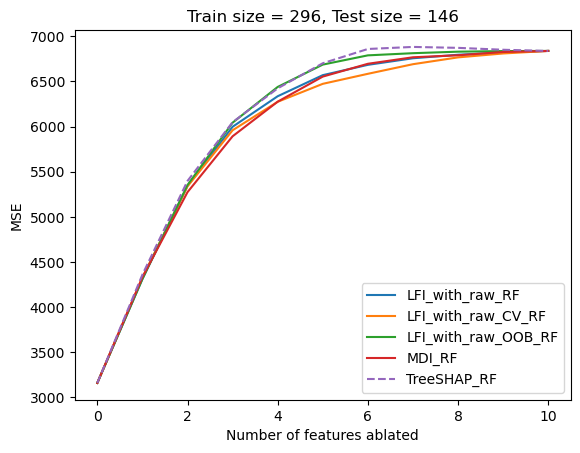

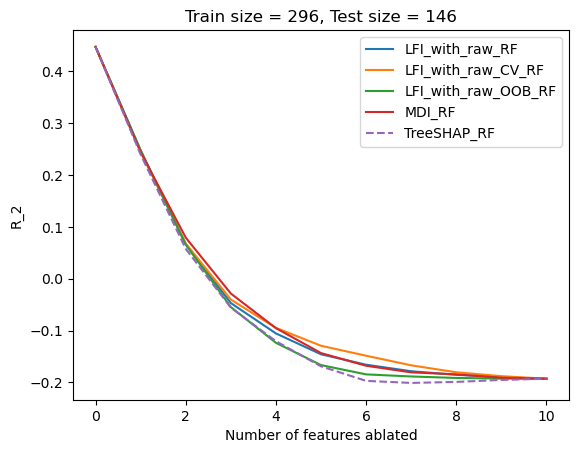

In [ ]:
for metric in metrics[task]:
    results = {}
    for m in methods_rf:
        results[m] = []
    for m in methods_rf:
        results[m].append(combined_df[combined_df['fi'] == m][metric+f"_before_ablation"].mean())
        for i in range(num_features):
            results[m].append(combined_df[combined_df['fi'] == m][metric+f"_after_ablation_{i+1}"].mean())
    fig, ax = plt.subplots()
    for m in methods_rf:
        if m in ["TreeSHAP_RF"]:#, "LIME_RF_plus"]:
            ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
        else:
            ax.plot(range(num_features+1), results[m], label=m)
    ax.set(xlabel='Number of features ablated', ylabel=metric,
            title=f'Train size = {n_testsize["train_size"].values[0]}, Test size = {n_testsize["test_size"].values[0]}')
    ax.legend()
    # plt.savefig(f"ablation_fico.png")
    plt.show()

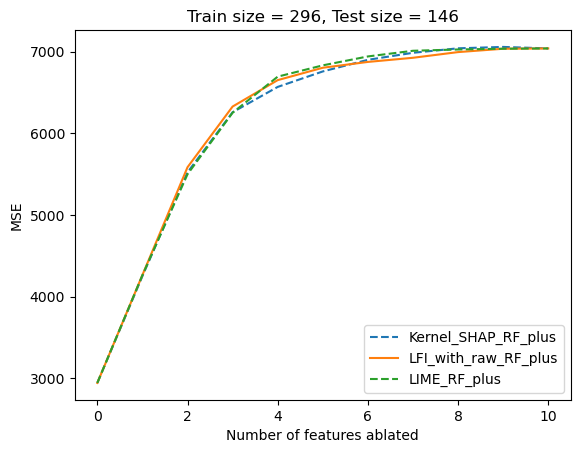

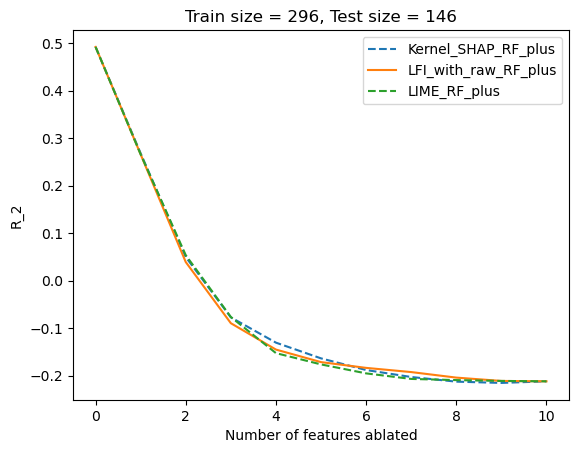

In [ ]:
for metric in metrics[task]:
    results = {}
    for m in methods_rf_plus:
        results[m] = []
    for m in methods_rf_plus:
        results[m].append(combined_df[combined_df['fi'] == m][metric+f"_before_ablation"].mean())
        for i in range(num_features):
            results[m].append(combined_df[combined_df['fi'] == m][metric+f"_after_ablation_{i+1}"].mean())
    fig, ax = plt.subplots()
    for m in methods_rf_plus:
        if m in ["Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
            ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
        else:
            ax.plot(range(num_features+1), results[m], label=m)
    ax.set(xlabel='Number of features ablated', ylabel=metric,
            title=f'Train size = {n_testsize["train_size"].values[0]}, Test size = {n_testsize["test_size"].values[0]}')
    ax.legend()
    # plt.savefig(f"ablation_fico.png")
    plt.show()